In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler

In [95]:
df=pd.read_csv('Downloads/Downloads_Ubuntu/rainfall in india 1901-2015.csv')
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [97]:
df_groups=df.groupby("SUBDIVISION")
df_a=df_groups.get_group('ASSAM & MEGHALAYA')
df_a.reset_index()
df_a

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
207,ASSAM & MEGHALAYA,1901,27.1,19.5,30.6,223.0,207.0,524.9,430.6,464.1,291.4,163.7,115.6,1.2,2498.6,46.6,460.5,1710.9,280.5
208,ASSAM & MEGHALAYA,1902,9.3,10.2,105.6,350.0,262.1,620.7,510.8,536.0,441.3,97.0,7.8,1.3,2952.1,19.4,717.6,2108.9,106.2
209,ASSAM & MEGHALAYA,1903,19.9,25.4,103.6,140.6,206.6,607.4,362.7,551.9,306.4,159.5,59.3,1.3,2544.7,45.4,450.8,1828.5,220.1
210,ASSAM & MEGHALAYA,1904,11.1,56.1,51.9,457.1,375.2,385.7,477.6,438.8,245.9,115.9,46.4,2.5,2664.1,67.1,884.2,1548.0,164.8
211,ASSAM & MEGHALAYA,1905,19.9,16.9,137.9,213.0,275.5,521.7,439.1,649.1,276.0,200.0,16.8,24.8,2790.6,36.8,626.3,1886.0,241.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,ASSAM & MEGHALAYA,2011,11.1,11.4,109.0,92.1,238.3,316.0,395.8,302.6,221.6,30.2,11.9,3.5,1743.4,22.5,439.4,1236.0,45.6
318,ASSAM & MEGHALAYA,2012,15.2,6.9,28.8,279.1,185.8,729.7,444.3,289.2,411.6,199.4,17.1,2.3,2609.4,22.1,493.7,1874.8,218.8
319,ASSAM & MEGHALAYA,2013,1.1,9.6,44.0,112.8,346.7,286.2,367.8,289.7,229.3,126.3,1.0,2.0,1816.4,10.7,503.5,1172.9,129.3
320,ASSAM & MEGHALAYA,2014,2.0,28.3,29.3,51.5,351.1,426.4,374.4,484.6,420.2,35.0,3.0,0.4,2206.1,30.3,431.9,1705.5,38.5


In [98]:
df_ts=pd.concat([df_a['YEAR'],df_a['ANNUAL']],axis=1)
df_ts

,YEAR,ANNUAL
207,1901,2498.6
208,1902,2952.1
209,1903,2544.7
210,1904,2664.1
211,1905,2790.6
...,...,...
317,2011,1743.4
318,2012,2609.4
319,2013,1816.4
320,2014,2206.1


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

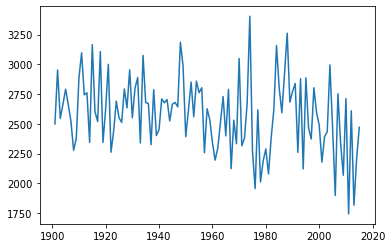

In [99]:
time=df_ts['YEAR']
series=df_ts['ANNUAL']
#series=MinMaxScaler.fit_transform(x=series)
#print(max(series))

plt.plot(time,series)
plt.plot

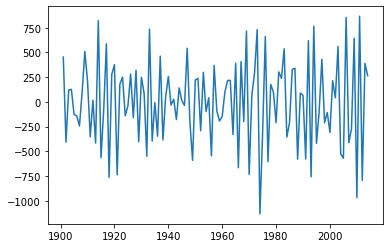

In [100]:
first_diff=np.array([series.iloc[i+1]-series.iloc[i] for i in range(len(series)-1)])
plt.plot(time[:-1],first_diff)

In [101]:
def rollingmean(time,series):
    rolling_mean=np.zeros(len(time))
    rolling_mean[0]=series[0]
    rolling_sum=series[0]
    for i in range(1,len(time)):
        rolling_sum+=series[i]
        rolling_mean[i]=rolling_sum/i+1
    return rolling_mean        

In [102]:
def impute_miss(series):
    if series.isnull().values.any():
        series_1=series.interpolate(method='linear')
        return series_1
    return series

In [103]:
split_time=3*len(series)//4
train=series[:split_time]
test=series[(split_time+1):]
train

207    2498.6
208    2952.1
209    2544.7
210    2664.1
211    2790.6
        ...  
288    2382.2
289    2620.0
290    3157.0
291    2801.6
292    2592.8
Name: ANNUAL, Length: 86, dtype: float64

In [104]:
train=impute_miss(train)
test=impute_miss(test)
train

207    2498.6
208    2952.1
209    2544.7
210    2664.1
211    2790.6
        ...  
288    2382.2
289    2620.0
290    3157.0
291    2801.6
292    2592.8
Name: ANNUAL, Length: 86, dtype: float64

<BarContainer object of 10 artists>

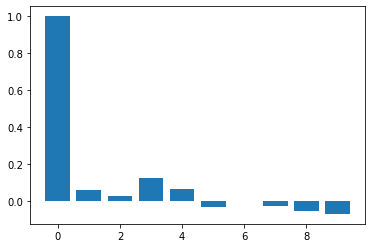

In [105]:
num_lags=10
acf_vals=acf(train)
plt.bar(range(num_lags),acf_vals[:num_lags])

<BarContainer object of 10 artists>

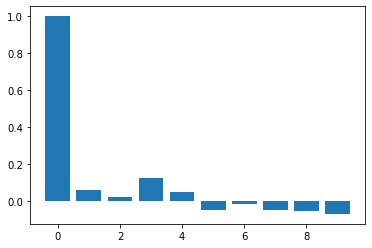

In [106]:
num_lags=10
pacf_vals=pacf(train)
plt.bar(range(num_lags),pacf_vals[:num_lags])

In [107]:
ma=3
ar=3

In [108]:
model=ARIMA(train,order=(5,1,5))
model_fit=model.fit()

/home/dell/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dell/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dell/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dell/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/dell/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiza

In [109]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 ANNUAL   No. Observations:                   86
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -600.949
Date:                Sun, 20 Nov 2022   AIC                           1223.897
Time:                        12:32:56   BIC                           1250.766
Sample:                             0   HQIC                          1234.705
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7513     10.691     -0.070      0.944     -21.705      20.202
ar.L2         -0.7240      2.997     -0.242      0.809      -6.597       5.149
ar.L3         -0.1569      9.100     -0.017      0.9

In [110]:
pred_start=test.index[0]
pred_end=test.index[-1]
predictions=model_fit.predict(start=pred_start,end=pred_end)
residuals=test-predictions
residuals

/home/dell/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


294    747.654119
295     54.178083
296    186.520443
297    349.330641
298   -310.727904
299    246.057840
300   -404.990053
301    379.054207
302   -154.389591
303   -222.132982
304    311.719989
305     34.385837
306   -147.767424
307   -357.909470
308   -108.680379
309   -179.493480
310    391.213962
311    -27.214250
312   -650.822740
313    117.956000
314   -206.933084
315   -428.935316
316    106.479298
317   -867.377787
318    108.449393
319   -723.163049
320   -427.308362
321    -86.137497
dtype: float64

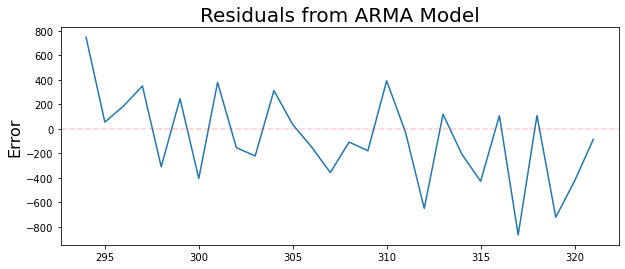

In [111]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

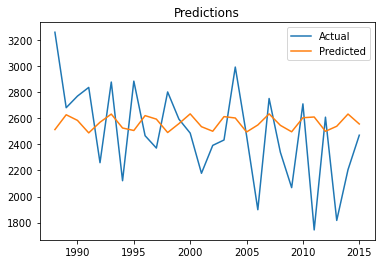

In [112]:
plt.plot(time[split_time+1:],test,label="Actual")
plt.plot(time[split_time+1:],predictions,label="Predicted")
plt.title("Predictions")
plt.legend()

In [113]:
predictions=np.zeros(len(test))
for i in range(len(test)):
    model=ARIMA(series[:split_time+i],order=(3,1,0))
    model_fit=model.fit()
    pred_start=test.index[i]
    next_pred=model_fit.forecast(1)
    predictions[i]=next_pred
residuals=test-predictions
residuals

/home/dell/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dell/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dell/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dell/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/dell/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index w

294    435.969722
295   -187.725886
296    -93.577481
297     -9.634169
298   -698.103775
299     -2.331405
300   -520.433007
301    168.986955
302    -34.118952
303   -170.724612
304    240.465930
305     86.505664
306   -110.085301
307   -363.223225
308   -205.660800
309   -103.698788
310    578.043254
311    118.035349
312   -574.422138
313    182.214248
314   -176.251308
315   -462.801663
316    399.474217
317   -589.734412
318    171.455377
319   -412.820413
320    -98.262098
321    252.256048
Name: ANNUAL, dtype: float64

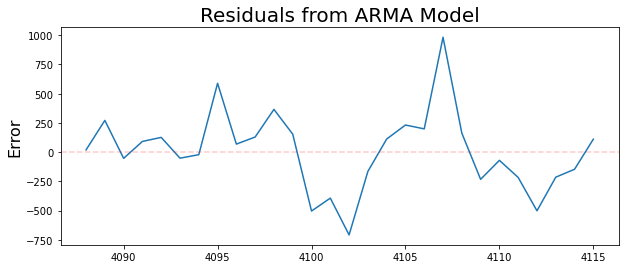

In [89]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

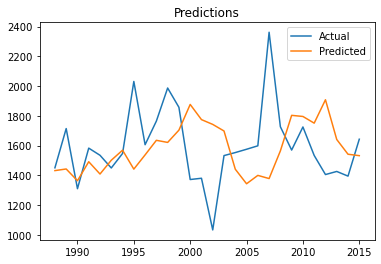

In [90]:
plt.plot(time[split_time+1:],test,label="Actual")
plt.plot(time[split_time+1:],predictions,label="Predicted")
plt.title("Predictions")
plt.legend()


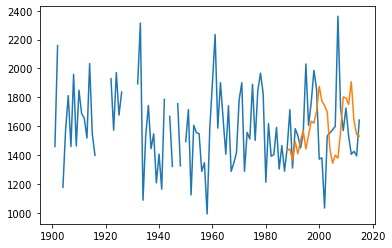

In [91]:
plt.plot(time,series)
plt.plot(time[split_time+1:],predictions)


In [92]:
print("Mean Absolute Percentage Error : %f" %np.mean(abs(residuals/test)*100))

Mean Absolute Percentage Error : 15.666442


In [93]:
print("Root Mean Square Error : %f" %((np.mean(residuals**2))**0.5))

Root Mean Square Error : 333.098446


TypeError: Could not convert H14663H2037H3802H3834H5053H4977H7390H14488H19355H18601H18177H356H15676H19442H14635H13053H14330H14331H19461H19462H17764H16563H2103H4421H4438H15578H15579H7015H16003H18009H19316H15609H15610H17251H17252H13147H13148H3595H3596H3649H3695H3696H3792H3850H4018H4101H4651H3481H6729H17837H4081H12871H12872H18579H2417H2586H2695H5910H6242H3500H3579H6838H13522H13523H13524H13525H5464H5486H5487H6145H6146H7181H15714H18066H14149H12996H2418H2507H2593H2638H2639H2640H2641H3254H3588H3728H5256H401H403H4099H4955H12920H18238H15849H17002H3201H3607H2584H2585H3280H6383H2127H2128H3480H3539H3912H3913H3712H19807H13056H13057H19061H6042H13791H18845H18931H16390H18855H19078H19079H16169H18836H18837H18838H18839H18927H19075H19076H19882H13262H14105H15087H15371H17107H17161H17162H17163H17225H17226H17484H17485H17486H18659H18660H18841H18843H18844H18846H18853H18854H18929H18930H19041H19042H19065H19067H19074H19077H19571H3581H4040H6746H14195H6282H6283H19519H3295H3296H3840H6737H743H4657H4658H16760H1858H575H14965H14966H16992H2609H6710H6958H6959H6965H7146H2443H389H12663H15367H15403H15404H6661H6663H12608H13748H14170H16589H16590H17022H18310H18311H18746H18925H18926H19601H6271H6773H7169H3402H12628H12909H13584H13585H15862H15863H15943H17176H18342H18884H19126H2943H2944H3760H3761H5404H5441H5788H5789H5790H5823H5824H5947H7455H7456H7457H15793H2412H2413H7351H6722H14744H19167H592H14798H2123H3121H4403H13065H18565H18044H19751H13173H18205H18206H13298H18729H19875H6074H6775H3768H14396H15956H15957H15958H17551H18512H3248H14401H7398H7399H1358H2775H2985H17017H16546H178H179H18219H18401H3584H3635H3762H3772H5198H7252H7290H16069H19112H19113H13805H14003H14004H15830H16706H16768H17109H17832H19480H7237H7478H16461H17738H6523H6524H19084H19085H14408H14409H14411H14412H14413H15288H14723H15988H16741H16742H14779H4289H5600H6287H4290H5065H6178H13158H13159H16999H18494H3723H4235H4236H4298H4299H4300H15411H16369H15055H15056H16477H16478H4395H13997H16790H16791H16792H4895H7083H7084H7272H13083H13084H13934H13936H13937H13938H13939H13940H6273H16407H16408H2374H2375H2376H2377H2378H2379H3066H4295H5954H14799H2311H5455H5888H14976H14977H6685H3793H3794H3795H3819H3820H3859H3902H3962H4699H5199H5549H7440H15020H13356H13749H14144H15152H15810H17972H17973H18483H18484H18514H18515H18625H18626H19160H19161H2500H505H12657H18964H3941H3942H516H15274H13404H18633H18634H15217H6493H13390H17081H15289H5414H17711H5483H18274H18384H18566H19951H12889H13072H13792H17144H17889H18510H18671H18672H18698H3551H4007H4408H4767H6360H6587H6930H13128H13129H15660H15661H18744H6252H4899H14165H13145H6872H1265H1272H14599H15146H15478H15479H15738H16058H19338H19930H19934H19960H2537H4661H485H486H5266H5303H5304H5391H5393H5429H6257H6716H18102H18103H18264H1286H1293H14392H14393H14695H15408H15953H19927H19939H4611H495H496H5071H5072H5246H5251H5336H7140H7141H18726H1892H1893H19972H14016H5755H5818H5819H15025H19439H17695H14245H1891H1895H1897H1440H6308H6309H1476H7369H7372H13801H17028H2954H3989H3990H5131H16452H14669H19723H12767H17879H17880H2317H4459H4460H6379H3501H410H18647H18648H18649H15697H17130H17405H17406H17680H17681H17682H17683H17687H17690H18022H18023H18024H18026H18027H18036H18037H18209H18210H18937H17039H14531H17726H5588H2229H5927H16777H12683H12844H16436H12803H12770H425H16520H13383H19243H158H16119H17333H19561H6108H7472H7473H14989H16183H13849H15663H15698H15710H15711H15712H16510H16511H16726H17465H17900H18186H18187H18406H18653H18802H19795H2204H2205H2206H3851H3882H4088H4387H572H573H7417H5025H5026H569H570H18681H18708H6585H17504H5277H19928H5315H14777H18725H19768H18095H18096H17300H17301H17302H3393H2781H2782H16264H16736H12904H15752H16918H17027H17173H19847H2867H3602H3706H3707H4531H4532H4533H4534H5771H5772H5773H5867H5868H60H61H6892H4913H13441H13470H13471H14288H19052H4019H4521H7395H16223H17772H17773H6546H1283H13091H15320H15405H15593H16292H16464H16465H16545H16746H16788H16919H16923H16924H16927H16990H17131H17175H18352H19701H19702H2226H2227H2324H2325H2326H2327H2528H2529H2660H291H4548H4549H5614H5615H5816H14194H18183H1542H1544H13068H14651H1545H1546H1547H1548H1549H1550H1552H1553H1555H1556H15790H15791H17707H18040H18227H374H376H378H379H380H3965H4932H6152H656H377H4170H686H3651H16697H6041H17730H12843H17292H17678H17679H17820H17887H18720H3019H3234H3670H397H4166H7298H16051H15715H5342H266H3375H5825H18913H5833H3237H5807H13860H13861H5808H5809H15690H15691H4064H15860H19989H14739H2783H5902H5903H6435H3632H3719H3720H3721H3724H3725H3727H3729H3735H3743H3744H3756H3758H5235H5345H5495H6134H7074H1875H2296H3031H16983H18098H17748H2536H15643H3032H17861H15583H15584H6633H16353H18963H18456H18457H18850H5835H3698H6188H6093H5875H5932H5933H2950H3532H3533H17099H6502H6509H13649H14316H14317H2951H3281H3733H3734H3957H4043H4529H4695H4747H4748H479H5151H5167H5168H5609H6214H65H6809H7156H4129H3566H3567H3798H3968H3488H18241H19190H17376H17377H1921H18518H552H553H15481H16275H16276H18292H4158H546H547H3661H4392H4393H6495H13001H5374H5375H18340H4713H16530H19117H17489H17491H19557H19558H5601H15904H15905H15906H17086H13240H13388H13813H13814H13815H15879H19620H18688H1723H17521H2328H2329H3938H4756H5470H5471H13831H15305H4575H6591H6856H6857H12716H12717H14080H17119H17120H18212H17357H17358H174H17761H2341H500H501H19300H17123H18086H18088H4013H4413H4414H4564H4678H4679H5433H5434H6920H14673H3660H14841H3145H3508H3746H6276H6277H6280H6281H6549H19136H6387H6603H7469H17898H17899H14783H14784H3308H4031H16678H17502H19070H13648H13456H19053H2369H2370H13010H16348H2371H5211H3367H14560H14440H14444H1810H7387H6944H6945H16863H16909H16958H17288H17289H4243H4244H4245H4598H4599H4625H4626H4703H4704H4772H4951H5410H6551H6846H7338H7339H7477H16427H16428H2676H4240H252H5602H3966H6567H6581H6582H2427H2428H3187H3188H5154H12886H16893H2570H2571H328H4893H5840H15017H15018H13964H15510H15993H16085H16086H16457H19414H19885H2279H2569H303H304H319H320H329H330H331H350H3556H4021H4378H4649H5838H5839H6452H6578H6579H7142H6393H18345H2343H259H276H277H278H3189H7164H4783H4784H15086H17853H2316H4027H17318H14848H6476H3869H528H4110H5088H5291H5292H5293H6840H6841H12892H13217H14696H387H18598H18019H18020H6698H6699H2154H2363H13417H2915H510H15639H15640H17243H19859H5504H6207H6208H17994H3915H6989H17197H6127H16898H6458H13103H13104H13264H13265H19991H2185H2431H4742H4905H5194H5262H5263H6986H349H6410H6588H6589H1605H7206H4015H18151H18152H19379H18783H4824H6037H7445H5435H5436H5535H5536H17445H19704H13800H15474H15475H2186H2313H2454H2455H4563H3621H18164H18165H13039H4369H4370H15818H18081H4100H1576H15129H13410H13411H1517H1933H18692H13015H13016H3974H6230H6231H13170H1577H6244H16935H13093H13309H17704H18314H18315H18571H19202H1996H1997H2248H2998H4139H4145H4159H4160H17759H19903H2009H7305H12631H12664H12969H14639H14640H15235H15811H15941H16178H16242H17132H18333H18365H18366H18387H5081H5729H5765H15351H15352H15534H16172H17031H15518H15519H15520H13882H19897H16688H12701H12702H13191H13192H15102H15103H4926H5350H5380H5381H12931H12914H12915H18534H18747H18748H1877H1898H1899H19048H19252H4151H4152H4306H4384H5104H5563H6302H12800H1533H1534H19026H19898H19908H19919H12966H1935H3781H4142H6728H12864H12865H17311H6189H16916H16917H12994H4037H4803H15349H4407H15981H14549H14575H14790H17589H13034H17897H3403H4302H4303H12828H3143H5243H5244H18013H7035H4134H4135H16775H16776H5388H19182H14445H4680H6267H5417H6304H6530H14465H14466H15026H15027H1571H1631H17594H18308H2552H2553H2905H4253H4255H5749H5796H5797H6377H17294H6565H6566H2006H404H405H406H4427H2673H7166H14247H18776H360H18487H18488H15683H5141H15071H15293H15294H15295H15296H16343H16720H4673H5472H6081H6083H6688H15064H4137H2550H2551H399H400H4141H1869H17803H18248H18805H19247H3770H19913H13741H13742H15970H4252H5764H5882H7098H15099H15100H4609H4610H16456H18734H4136H4143H15245H5497H18587H19899H6884H13663H18316H18317H6285H6286H17796H17797H14644H4263H5218H18059H18060H19869H6708H16652H4972H5372H6177H6552H16945H15571H12748H19900H12694H12696H12710H12711H12712H12765H13633H14427H16951H18620H18817H18818H18819H18833H2004H3783H4373H5100H5101H5171H5202H5923H5943H6764H18635H18636H317H14147H15695H16305H15412H15824H16438H2913H2914H4282H12901H12902H14678H19574H2354H4786H5089H5928H5929H13119H15057H15429H15430H15431H15432H3270H4622H4623H7264H18386H15176H13169H13896H15062H15433H15491H15702H15777H16113H16289H17768H17833H17834H17954H18354H18433H19909H3229H3230H3257H3665H4362H439H441H4415H442H443H444H446H447H449H451H4676H5162H5163H6635H6636H6668H6669H13582H14183H14184H14233H16263H16351H16666H17128H17555H17556H2290H3875H4436H4482H4483H461H462H465H5865H5949H5950H6486H6489H6522H6623H6762H2166H15111H15477H1808H5228H6933H6934H4495H4496H14945H2346H3944H3945H1296H1812H1819H5524H5525H6008H6013H7407H4773H1280H1281H1285H1287H1288H1289H1290H696H7365H7366H1830H4061H4440H13962H2007H2971H1278H6926H5346H15821H13051H17805H2610H2611H2701H16887H4526H17475H14694H1292H6512H16430H13662H15615H15754H17312H17313H12998H12999H13002H13003H14014H14586H14587H14661H15721H15722H16144H17178H18612H18613H18614H3274H3711H3791H3871H3873H3887H3906H3907H3921H3922H3967H3971H4026H4067H4126H4127H4155H4156H4157H4279H4292H4312H4331H4499H4500H4725H4867H4973H5205H5397H5542H6217H6218H19849H16986H16987H7412H18580H2139H2396H5632H615H4705H4711H17394H17395H12723H18007H608H13960H14512H14513H4456H602H15536H13249H17902H18082H14370H14766H17278H15145H16356H16357H18078H18357H19219H15631H15632H6960H4593H5236H5237H5238H15763H160H15192H15581H19645H6187H15827H2812H17348H17113H17434H15202H15209H15459H15769H15812H16496H16984H17448H17846H18290H18378H18382H18557H18558H18878H18974H19055H19156H19312H19598H3008H3238H3598H48H5142H5290H6204H6537H7470 to numeric

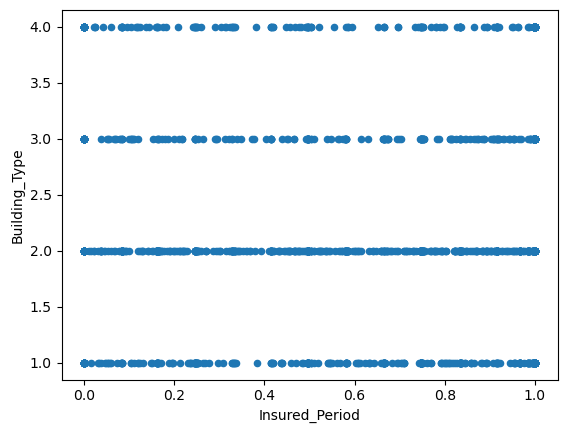

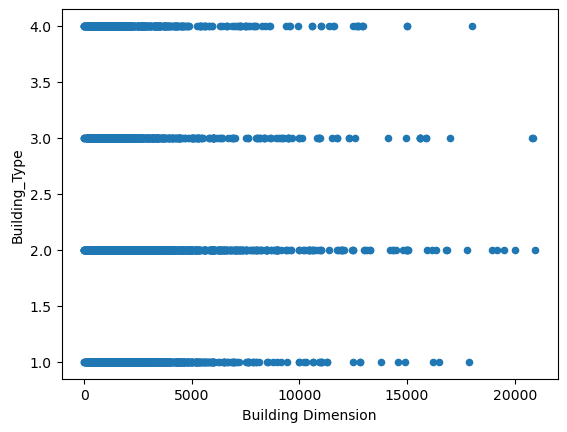